# Coding gradient descent algorithm to minimize cost function from a basic ML regression model II

## VERSION IIb : utilisation de matrices - simplification

A basic situation :

data : X=(1,2,3,4,5,6), Y=(2, 3, 4, 5, 6, 7) 

model : f(x) = ax + b

cost function : from euclidian distance

minimizing cost function with gradient descent algorithm



**Evolutions :**

#### Evolution1 : ajout de l'historique du R2 pour visualiser son évolution pendant la descente du gradiant.

#### Evolution2 : mise sous forme de fonction pour générer les différents résultats graphiques et statistiques selon :
- les paramètres de départ
- le nombre d'itérations

#### Evolution3 : ajout des autres critères d'optimisation.

#### Evolution4 : Modification de la descente : descente par séquences définies par les n+1 directions (en préparation aux modèles lin. de degré > 1).

#### Evolution5 : Etude d'un modèle linéaire de dimension 2

Autres : 
La descente du gradiant est définie avec un hyperparamètre alpha qui indique le déplacement a effectuer dans le sens de la pente, par la valeur donnée par alpha * pente. Or, à proximité du minimum, la pente tend vers 0, le déplacement devient minime. Alpha ne peut cependant pas être défini 'trop grand' au début, sinon,
on risque de 'tourner' autour du minimum.

Ajout d'un paramétrage de alpha : si on se place au-delà du minimum (détecté par le changement de signe de la pente), alors on réduit alpha (de 90% ici). alpha peut alors être initialisé avec une valeur 'grande'.



# Imports

In [1]:
#imports
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from datetime import datetime


#Functions

#Calcul de la valeur de la fonction de coût en a, b = j(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à a au point a,b = dja(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à b au point a,b = djb(a,b)

# 1.Data

In [2]:
# -------------------------------------------------------------------------------------------------------
# data
# -------------------------------------------------------------------------------------------------------
x=np.array([[1],
            [2],
            [3],
            [4],
            [5],
            [6]
           ])

Y=np.array([[1],
            [2],
            [3],
            [4],
            [5],
            [6]
           ])

Y=Y+np.ones((Y.shape))


## Cas d'un modèle linéaire simple (y=ax+b)

In [3]:
X=np.hstack((x, np.ones((x.shape[0],1),int)))     #on ajoute une colonne de m valeurs fixées à 1 à x

In [4]:
m=X.shape[0]  #m=nombre d'observations
n=x.shape[1]  #n=nombre de features (hors biais) = X.shape[0] - 1

# 2.Le modèle

In [5]:
# -------------------------------------------------------------------------------------------------------------
# definition du modèle : un modèle linéaire affine de typ f(X)=XTheta - calcul de Y en X pour Theta donnés 
# -------------------------------------------------------------------------------------------------------------
def f(X,Theta):
    """
    entrée : X matrice (m, n+1) avec m nombre d'observations, n nombre de features
             Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    sortie : la matrice produit X.Theta (m,1) = (a1x1i + a2x2i + ... + anxni + b)i=1...m donnant la valeur f(X,Theta)
    """
    return (X.dot(Theta))

# 3.La fonction de coût

In [6]:
# ---------------------------------------------------------------------------------------------------------
# Fonction de coût j (ici norme euclidienne) - calcul de la fonction j en Theta, pour les données X 
# ---------------------------------------------------------------------------------------------------------
def cost_function(X, Theta):
    """
    Définie par la norme euclidienne
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la valeur de la fonction de coût pour les paramètres Theta (en X, Y)
    """
    #Calcul de la somme des carrés
    result  = 1/(2*m) * np.sum( (X.dot(Theta) - Y)**2 )
    
    #Autre écriture :  result = 1/(2*m) * (X.dot(Theta) - Y).T.dot(X.dot(Theta) - Y)   
    
    return result 
    

# 4.Calcul du gradiant

In [7]:
    
# -------------------------------------------------------------------------------------------------------
# Détermination du gradiant de j selon a et b pour les données X :
# -------------------------------------------------------------------------------------------------------
def gradj(X, Theta):
    """
    Calcul du gradiant (matrice n+1, 1)
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la matrice (n+1,1) des dérivées de la fonction de coût pour chaque paramètre en Theta (pour X, Y donnés)
    """    
    gradJTheta = 1/m *  X.T.dot(f(X,Theta) - Y)
 
    return gradJTheta

# 5.Calcul des paramètres Theta optimaux par l'algo de descente du gradiant

In [8]:
# -------------------------------------------------------------------------------------------------------
# algorithme de descente du gradiant en X,Y  
# -------------------------------------------------------------------------------------------------------
def gradient_descent(X, Y, Theta, learning_rate, n_iterations):
    """
    Calul des paramètres Theta obtenus après 'descente' de la fonction de coût pendant n_iterations
    Entrée : la matrice X (matrice (m,n+1) des features en col1àn et de la colonne de 1 en coln+1)
             la matrice y (matrice (m, 1 ))
             Theta = la matrice des paramètres initiaux
             learning_rate = le coefficient d'apprentissage alpha
             n_iterations = le nombre d'itérations max
             
    Sortie : la matrice Theta des paramètres obtenus en fin d'itération
             + matrice des valeurs de la fonction de coût pour chaque itération pour graphique
    """  
    #Sauvegarde des valeurs de la fonction de coût et des paramètres theta par itération (pour utilisation ult.&graphiques)
    cost_function_values    = np.ones((n_iterations,1))
    cost_function_values[0] = cost_function(X, Theta)    #sauvegarde des valeurs pour graphique
    Theta_values            = Theta
     
    for i in range(1, n_iterations):

        Theta = Theta - learning_rate * gradj(X, Theta)   #calcul du déplacement de Theta selon le gradiant en Theta
        
        #Sauvegarde des nvelles valeurs de la f° de coût et des parm theta par itération (pour utilisation ult.&graphiques)
        cost_function_values[i] = cost_function(X, Theta)    #sauvegarde des valeurs pour graphique
        Theta_values            = np.hstack((Theta_values, Theta)) #sauvegarde des Theta (par ajout de colonnes)
  
    return Theta, cost_function_values, Theta_values


# 6.Entraînement du modèle

In [9]:
#------------------------------
# Lancement de l'algorithme
#------------------------------

#Initialisations
#Theta = np.random.randn(n+1,1) #la matrice (m,1) Theta des paramètres de départ -> un random de n+1 paramètres (n features + biais)
Theta = np.array([[-2],[20]])
n_iterations = 100            #nombre d'itérations choisi
learning_rate = 0.1            #le coefficient de descente

#Calcul de Theta final (après descente du gradient)
Theta_final, cost_function_values, Theta_values = gradient_descent(X, Y, Theta, learning_rate, n_iterations)

print("\nrésultat final avec n_iterations =", n_iterations)
print("Theta=")
print(Theta_final)
print("cost_fuction_values finales=")
print(cost_function_values[-1])


résultat final avec n_iterations = 100
Theta=
[[0.2952109 ]
 [4.01734203]]
cost_fuction_values finales=
[0.87596379]


# 7.Calcul du coefficient de détermination R2

In [10]:
# -------------------------------------------------------------------------------------------------------
# Evaluation de la performance du modèle - le coef de détermination R2
# -------------------------------------------------------------------------------------------------------
def coef_det(X, Y, Theta):
    u = np.sum((Y-f(X, Theta))**2)
    v = np.sum((Y-np.mean(Y))**2)
    return 1 - u/v

In [11]:
print("R2 =", coef_det(X, Y, Theta_final))

R2 = 0.39933911430708935


# 8.Représentations graphiques

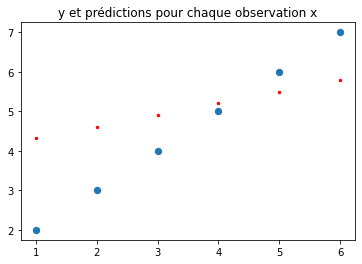

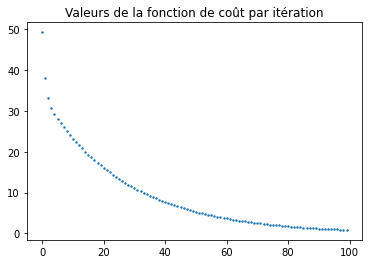

In [12]:
%matplotlib inline
#Graphe des points (en bleu) et de la prédiction (en rouge)
Y_predictions = f(X, Theta_final)
plt.scatter(x, Y, s=40)
plt.scatter(x, Y_predictions, c='r', s=6)
plt.title("y et prédictions pour chaque observation x")
plt.show()

#Graphe des valeurs de la fonction de coût sur l'ensemble des itérations
plt.scatter(range(0,n_iterations), cost_function_values, s=2 )
plt.title("Valeurs de la fonction de coût par itération")
plt.show()

#### Commentaires : 

On voit dans ce cas que le nombre d'itérations n'est pas suffisant (graphique 1). La fonction de coût est pourtant déjà proche de 0.

# Représentation graphique de la descente de gradiant

## Version pour le modèle linéraire à une dimension et une variable

Pour ce cas simple, la fonction sera représentée en 3D, et la descente sera celle implémentée ci-dessus ajoutée au graphique.


Using matplotlib backend: Qt5Agg


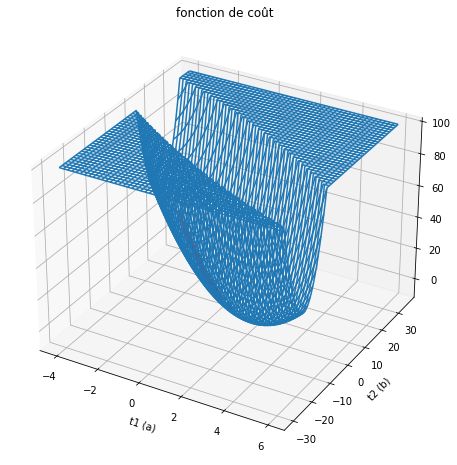

In [13]:
%matplotlib 
#%matplotlib notebook

#Graphe de la fonction de coût en 3D

#Paramètres du maillage
mint1 =-4 #-20
maxt1 =+6 #20
mint2 =-30 #-100
maxt2 =+35 #100
nb_pas=500


#création de l'axe3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Création du maillage pour la représentation graphique avec meshgrid
t1 = np.linspace(mint1, maxt1, num=nb_pas)   #x1=les valeurs du paramètre 1
t2 = np.linspace(mint2, maxt2, num=nb_pas)   #x2=les valeurs du paramètre 2
Theta1, Theta2 = np.meshgrid(t1, t2)

# Calcul des valeur de X3 sur tout le maillage
F=np.ones((len(t1), len(t2)))
for i in range(0, len(t1)):
    for j in range(0, len(t2)):
        F[i,j] = min(100,cost_function(X, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ])))

# Plot a basic wireframe
ax.plot_wireframe(Theta1, Theta2, F)
# SurfacePlot
#ax.plot_surface(Theta1, Theta2, F, cmap='plasma')

#Traçage de la descente de gradiant 
ax.scatter(Theta_values[0,:], Theta_values[1,:], cost_function_values, s=20, color='r')
#Traçage du point optimal
ax.scatter(np.array([[1]]), np.array([[1]]), cost_function(X, np.array([[1],[1]])), s=30, c='purple')

#limites
ax.set_zlim(-10,100)

#Labels
plt.title("fonction de coût")
plt.xlabel("t1 (a)")
plt.ylabel("t2 (b)")

plt.show()




# Résumé

On a construit un modèle linéaire de degré 1 de type f(x)=ax+b. On a déterminé la fonction de coût associée (en utilisant la norme euclidienne), la fonction gradiant correspondante (les fonctions dérivées dans chaque direction). </br>
Puis on a mis en place l'algorithme de descente du gradiant.

**1er résultats :** 
Avec des paramètres de départ aléatoires, ceux-ci sont proches des paramètres optimaux (1,1), la fonction de coût décroît très vite.
Cependant, elle décroît ensuite très lentement. Les prédictions sont fortement ajustées pour une faible variation de la fonction de coût relativement aux variations du départ. Ceci suggère que le critère de variation de la fonction de coût n'est pas suffisant pour arrêter la descente.

Le critère du R2 est de ce fait un critère important.


**Autres résultas :**
Avec la représentation 3D de la fonction de coût, on peut voir que les pentes sont très différentes selon la direction prise. On visualise la décroissance rapide de la fonction de coût au début des itérations, puis une décroissance plus douce ensuite.

#### A suivre : ajout des autres critères d'optimisation.







